1. To scrape the EUR/INR currency data from Yahoo Finance, covering the period from January 1, 2023, to sept 30, 2024.

In [420]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [422]:
start_date = '2023-01-01'
end_date = '2024-10-01'

In [424]:
# Download the historical data yahoo finance
currency_data = yf.download('EURINR=X', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [426]:
currency_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X
Date,,,,,,
2023-01-02 00:00:00+00:00,88.482002,88.482002,88.400002,87.157700,87.157700,0
2023-01-03 00:00:00+00:00,88.300003,88.300003,88.313004,87.225998,88.292000,0
2023-01-04 00:00:00+00:00,87.219002,87.219002,87.922997,87.219002,87.219002,0
2023-01-05 00:00:00+00:00,87.605003,87.605003,87.807999,86.757004,87.580002,0
2023-01-06 00:00:00+00:00,86.827003,86.827003,87.614998,86.647003,86.819000,0
...,...,...,...,...,...,...
2024-09-24 00:00:00+00:00,92.753998,92.753998,93.248001,92.671997,92.775002,0
2024-09-25 00:00:00+00:00,93.438004,93.438004,93.627998,93.083000,93.490997,0


In [428]:
currency_data.to_csv('EUR_INR_1data.csv')

2. Preprocessing of the dataset

In [476]:
data = pd.read_csv("C:/Users/ajayd/Alphashots/EUR_INR_1data.csv", skiprows=2) # to remove the extra header part from the dataset

In [478]:
# Assigning appropriate column names
data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']


In [480]:
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-01-02 00:00:00+00:00,88.482002,88.482002,88.400002,87.157700,87.157700,0
1,2023-01-03 00:00:00+00:00,88.300003,88.300003,88.313004,87.225998,88.292000,0
2,2023-01-04 00:00:00+00:00,87.219002,87.219002,87.922997,87.219002,87.219002,0
3,2023-01-05 00:00:00+00:00,87.605003,87.605003,87.807999,86.757004,87.580002,0
4,2023-01-06 00:00:00+00:00,86.827003,86.827003,87.614998,86.647003,86.819000,0
...,...,...,...,...,...,...,...
451,2024-09-24 00:00:00+00:00,92.753998,92.753998,93.248001,92.671997,92.775002,0
452,2024-09-25 00:00:00+00:00,93.438004,93.438004,93.627998,93.083000,93.490997,0
453,2024-09-26 00:00:00+00:00,93.000999,93.000999,93.467003,92.994003,92.995003,0
454,2024-09-27 00:00:00+00:00,93.367996,93.367996,93.629997,93.037003,93.371002,0


In [482]:
data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.0
mean,89.728670,89.728670,90.059415,89.396986,89.623414,0.0
std,1.428623,1.428623,1.418949,1.482412,1.491535,0.0
min,86.383003,86.383003,86.615997,85.691902,85.691902,0.0
25%,88.788000,88.788000,89.082251,88.431000,88.656498,0.0
50%,89.623501,89.623501,90.005001,89.386002,89.560001,0.0
75%,90.457003,90.457003,90.795502,90.197250,90.443251,0.0
max,93.722000,93.722000,93.839996,93.504997,93.700996,0.0


In [438]:
#to find number of missing values
data.isna().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [440]:
#To verify data types
data.dtypes

Date          object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object

In [442]:
#To sort the dataset by 'Date'
data.sort_values(by='Date').reset_index(drop=True)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-01-02 00:00:00+00:00,88.482002,88.482002,88.400002,87.157700,87.157700,0
1,2023-01-03 00:00:00+00:00,88.300003,88.300003,88.313004,87.225998,88.292000,0
2,2023-01-04 00:00:00+00:00,87.219002,87.219002,87.922997,87.219002,87.219002,0
3,2023-01-05 00:00:00+00:00,87.605003,87.605003,87.807999,86.757004,87.580002,0
4,2023-01-06 00:00:00+00:00,86.827003,86.827003,87.614998,86.647003,86.819000,0
...,...,...,...,...,...,...,...
451,2024-09-24 00:00:00+00:00,92.753998,92.753998,93.248001,92.671997,92.775002,0
452,2024-09-25 00:00:00+00:00,93.438004,93.438004,93.627998,93.083000,93.490997,0
453,2024-09-26 00:00:00+00:00,93.000999,93.000999,93.467003,92.994003,92.995003,0
454,2024-09-27 00:00:00+00:00,93.367996,93.367996,93.629997,93.037003,93.371002,0


In [484]:
# To convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

2. Technical analysis and calculate the following metrics for one day and one week from Sept 30, 2024

Simple Moving Average

In [486]:
# Calculate moving averages
data['sma1'] = data['Close'].rolling(window=5).mean()
data['sma2'] = data['Close'].rolling(window=20).mean()
data['sma3'] = data['Close'].rolling(window=50).mean()

In [488]:
data

,Date,Adj Close,Close,High,Low,Open,Volume,sma1,sma2,sma3
0,2023-01-02 00:00:00+00:00,88.482002,88.482002,88.400002,87.157700,87.157700,0,NaN,NaN,NaN
1,2023-01-03 00:00:00+00:00,88.300003,88.300003,88.313004,87.225998,88.292000,0,NaN,NaN,NaN
2,2023-01-04 00:00:00+00:00,87.219002,87.219002,87.922997,87.219002,87.219002,0,NaN,NaN,NaN
3,2023-01-05 00:00:00+00:00,87.605003,87.605003,87.807999,86.757004,87.580002,0,NaN,NaN,NaN
4,2023-01-06 00:00:00+00:00,86.827003,86.827003,87.614998,86.647003,86.819000,0,87.686603,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
451,2024-09-24 00:00:00+00:00,92.753998,92.753998,93.248001,92.671997,92.775002,0,93.020799,92.89905,92.113302
452,2024-09-25 00:00:00+00:00,93.438004,93.438004,93.627998,93.083000,93.490997,0,93.087601,92.88485,92.162082
453,2024-09-26 00:00:00+00:00,93.000999,93.000999,93.467003,92.994003,92.995003,0,93.102200,92.86995,92.195082
454,2024-09-27 00:00:00+00:00,93.367996,93.367996,93.629997,93.037003,93.371002,0,93.134200,92.89445,92.240082


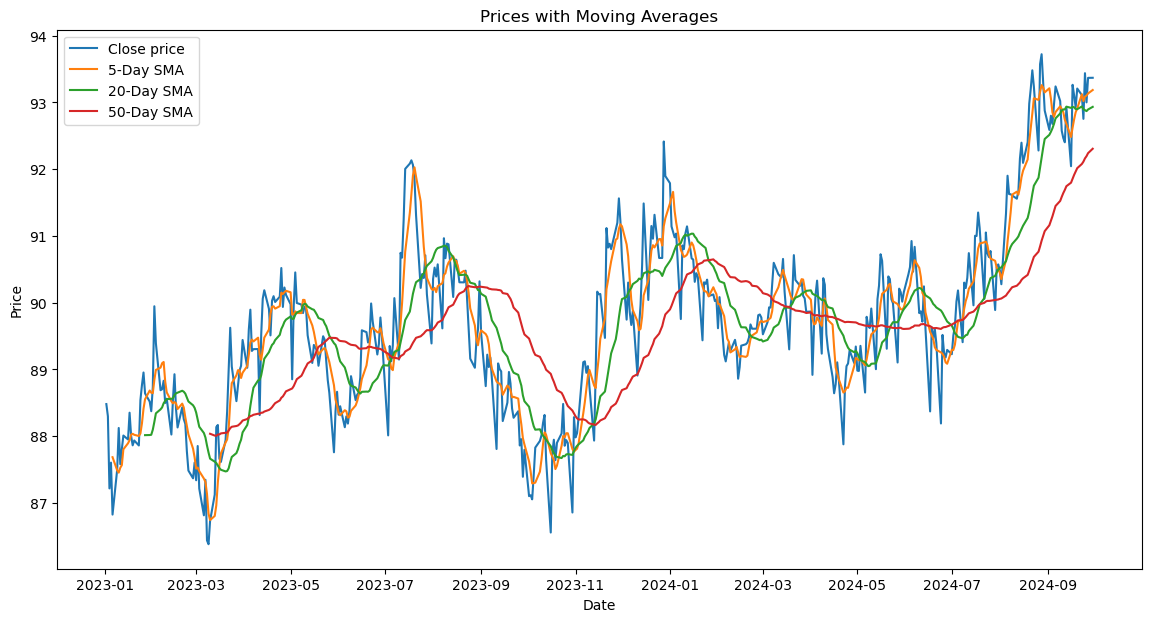

In [450]:
# Plot the moving averages of whole dataset.

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close price')
plt.plot(data['Date'], data['sma1'], label='5-Day SMA')
plt.plot(data['Date'], data['sma2'], label='20-Day SMA')
plt.plot(data['Date'], data['sma3'], label='50-Day SMA')
plt.title('Prices with Moving Averages', loc='center')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Bollinger Bands

In [490]:
# Calculate Bollinger Bands
window = 20

data['rolling_mean'] = price.rolling(window).mean()
data['rolling_std'] = price.rolling(window).std()

data['bollinger_upper'] = data['rolling_mean'] + (data['rolling_std'] * 2)
data['bollinger_lower'] = data['rolling_mean'] - (data['rolling_std'] * 2)

# Display the first 30 rows of the Bollinger Bands related columns to check calculations
data.tail(5)


,Date,Adj Close,Close,High,Low,Open,Volume,sma1,sma2,sma3,rolling_mean,rolling_std,bollinger_upper,bollinger_lower
451,2024-09-24 00:00:00+00:00,92.753998,92.753998,93.248001,92.671997,92.775002,0,93.020799,92.89905,92.113302,92.89905,0.379342,93.657735,92.140366
452,2024-09-25 00:00:00+00:00,93.438004,93.438004,93.627998,93.083000,93.490997,0,93.087601,92.88485,92.162082,92.88485,0.351186,93.587223,92.182478
453,2024-09-26 00:00:00+00:00,93.000999,93.000999,93.467003,92.994003,92.995003,0,93.102200,92.86995,92.195082,92.86995,0.338793,93.547535,92.192365
454,2024-09-27 00:00:00+00:00,93.367996,93.367996,93.629997,93.037003,93.371002,0,93.134200,92.89445,92.240082,92.89445,0.356652,93.607754,92.181146
455,2024-09-30 00:00:00+00:00,93.369003,93.369003,93.839996,92.414001,92.414001,0,93.186000,92.93350,92.306294,92.93350,0.364013,93.661526,92.205475


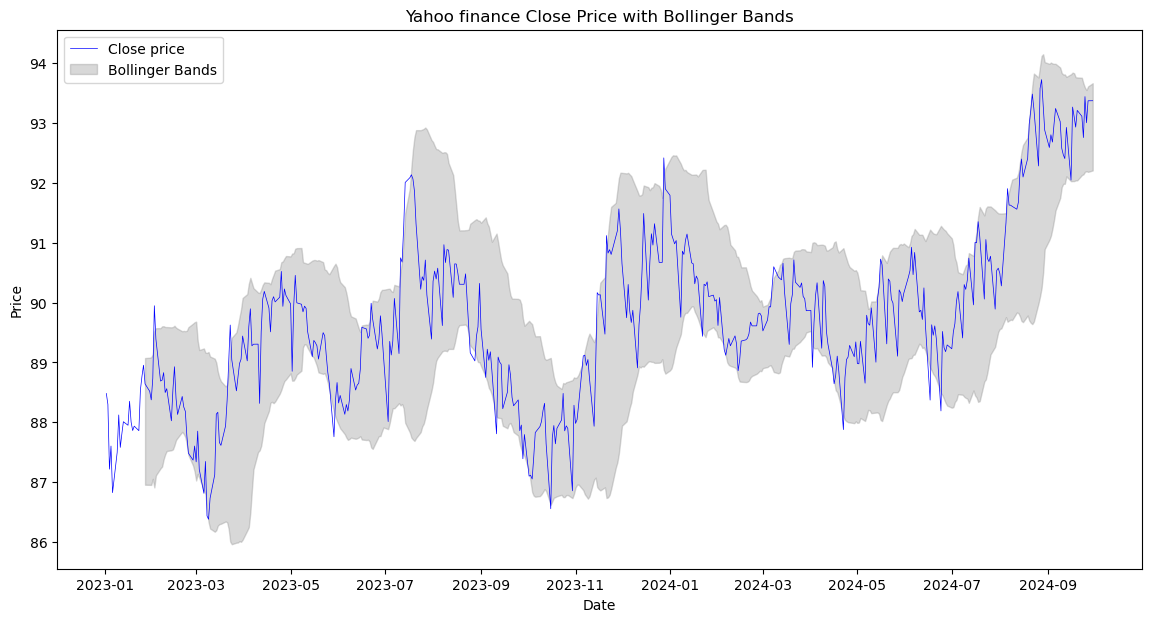

In [454]:
# Plot the price with Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], price, label='Close price', color='blue', linewidth=0.5)
plt.fill_between(data['Date'], data['bollinger_upper'], data['bollinger_lower'], color='grey', alpha=0.3, label='Bollinger Bands')
plt.title('Yahoo finance Close Price with Bollinger Bands', loc='center')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Commodity Channel Index(CCI)

In [492]:
# Define the window for CCI calculation
window = 20  

# Step 1: Calculate the Typical Price
data['Typical_Price'] = (data['High'] + data['Low'] + data['Close']) / 3

# Step 2: Calculate the Simple Moving Average (SMA) of the Typical Price
data['TP_SMA'] = data['Typical_Price'].rolling(window=window).mean()

# Step 3: Calculate the Mean Deviation
data['Mean_Deviation'] = data['Typical_Price'].rolling(window=window).apply(lambda x: np.mean(np.abs(x - np.mean(x))), raw=True)
# Step 4: Calculate the Commodity Channel Index (CCI)
data['CCI'] = (data['Typical_Price'] - data['TP_SMA']) / (0.015 * data['Mean_Deviation'])




In [319]:
data.tail(5)

,Date,Adj Close,Close,High,Low,Open,Volume,sma1,sma2,sma3,rolling_mean,rolling_std,bollinger_upper,bollinger_lower,Typical_Price,TP_SMA,Mean_Deviation,CCI
451,2024-09-24 00:00:00+00:00,92.753998,92.753998,93.248001,92.671997,92.775002,0,93.020799,92.89905,92.113302,92.89905,0.379342,93.657735,92.140366,92.891332,92.884077,0.229656,2.106169
452,2024-09-25 00:00:00+00:00,93.438004,93.438004,93.627998,93.083000,93.490997,0,93.087601,92.88485,92.162082,92.88485,0.351186,93.587223,92.182478,93.383001,92.876027,0.221606,152.514953
453,2024-09-26 00:00:00+00:00,93.000999,93.000999,93.467003,92.994003,92.995003,0,93.102200,92.86995,92.195082,92.86995,0.338793,93.547535,92.192365,93.154002,92.878327,0.223906,82.080554
454,2024-09-27 00:00:00+00:00,93.367996,93.367996,93.629997,93.037003,93.371002,0,93.134200,92.89445,92.240082,92.89445,0.356652,93.607754,92.181146,93.344999,92.904743,0.242856,120.854816
455,2024-09-30 00:00:00+00:00,93.369003,93.369003,93.839996,92.414001,92.414001,0,93.186000,92.93350,92.306294,92.93350,0.364013,93.661526,92.205475,93.207667,92.942328,0.232005,76.245232


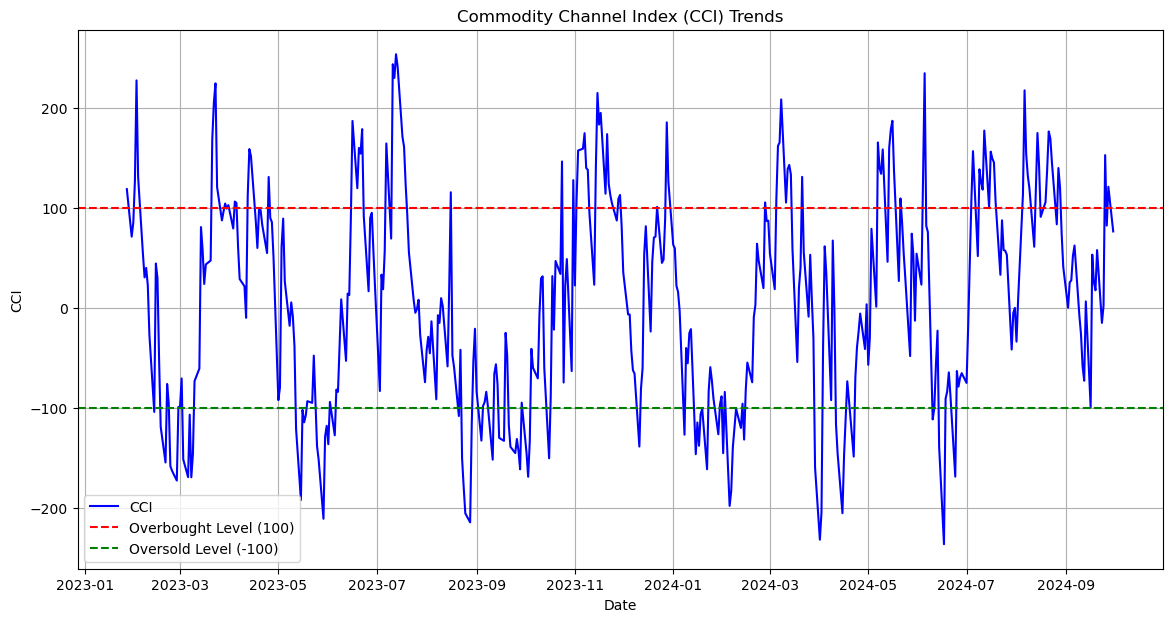

In [458]:
# Plot the price with CCI trends

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['CCI'], color='blue', label='CCI')
plt.axhline(100, color='red', linestyle='--', label='Overbought Level (100)')
plt.axhline(-100, color='green', linestyle='--', label='Oversold Level (-100)')
plt.title('Commodity Channel Index (CCI) Trends')
plt.xlabel('Date')
plt.ylabel('CCI')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Calculated technical indicators for Sept 30, 2024

In [494]:

Sept_30 = data[['Date', 'Close', 'sma1','sma2', 'sma3','bollinger_upper', 'bollinger_lower', 'CCI']].iloc[-1]
Sept_30 

Date               2024-09-30 00:00:00+00:00
Close                              93.369003
sma1                                  93.186
sma2                                 92.9335
sma3                               92.306294
bollinger_upper                    93.661526
bollinger_lower                    92.205475
CCI                                76.245232
Name: 455, dtype: object

The closing price is higher than the MA value, indicating that the price is trending above moving average. This suggesting a BUY decision.


The closing price is near the upper Bollinger Band, indicating a potential overbought condition. Price touching the upper band: This suggests that the asset may be overbought and could be a potential sell signal. So here the suggestion would be to SELL or remain NEUTRAL.


The CCI value below the overbought threshold of +100. This implies that while the price is trending higher, it’s not in an extreme overbought condition. Thus, the CCI indicates a NEUTRAL stance, as there is no strong overbought or oversold signal.



Calculated technical indicators for one week

In [496]:

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Crop the dataset using date-based slicing
start_date = '2024-09-24'
end_date = '2024-09-30' # We consider last 5 trading days as one week.

# Filter the DataFrame
one_week = data[start_date:end_date]


In [498]:
one_week

,Adj Close,Close,High,Low,Open,Volume,sma1,sma2,sma3,rolling_mean,rolling_std,bollinger_upper,bollinger_lower,Typical_Price,TP_SMA,Mean_Deviation,CCI
Date,,,,,,,,,,,,,,,,,
2024-09-24 00:00:00+00:00,92.753998,92.753998,93.248001,92.671997,92.775002,0,93.020799,92.89905,92.113302,92.89905,0.379342,93.657735,92.140366,92.891332,92.884077,0.229656,2.106169
2024-09-25 00:00:00+00:00,93.438004,93.438004,93.627998,93.083000,93.490997,0,93.087601,92.88485,92.162082,92.88485,0.351186,93.587223,92.182478,93.383001,92.876027,0.221606,152.514953
2024-09-26 00:00:00+00:00,93.000999,93.000999,93.467003,92.994003,92.995003,0,93.102200,92.86995,92.195082,92.86995,0.338793,93.547535,92.192365,93.154002,92.878327,0.223906,82.080554
2024-09-27 00:00:00+00:00,93.367996,93.367996,93.629997,93.037003,93.371002,0,93.134200,92.89445,92.240082,92.89445,0.356652,93.607754,92.181146,93.344999,92.904743,0.242856,120.854816
2024-09-30 00:00:00+00:00,93.369003,93.369003,93.839996,92.414001,92.414001,0,93.186000,92.93350,92.306294,92.93350,0.364013,93.661526,92.205475,93.207667,92.942328,0.232005,76.245232


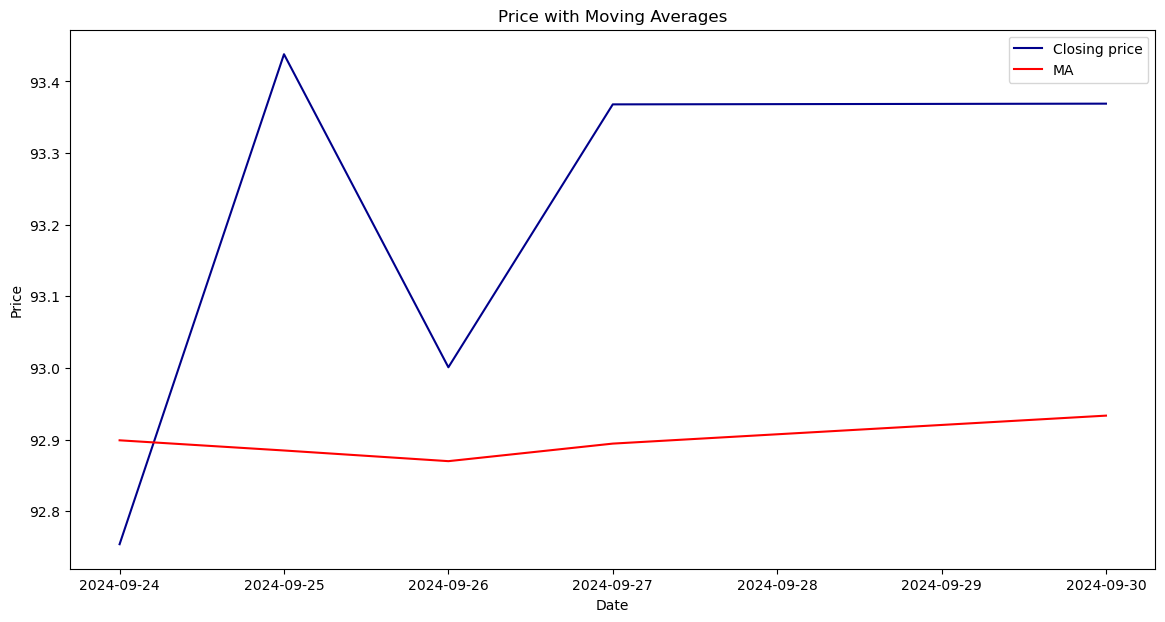

In [518]:
# Plotting moving averages
plt.figure(figsize=(14, 7))
plt.plot(one_week.index, one_week['Close'], label='Closing price', color='darkblue')
#plt.plot(one_week.index, one_week['sma1'], label='5-Day SMA')
plt.plot(one_week.index, one_week['sma2'], label='MA', color='red') #considering only 20-day moving average
#plt.plot(one_week.index, one_week['sma3'], label='50-Day SMA')

# Set plot title and labels
plt.title('Price with Moving Averages', loc='center')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

The closing prices consistently remain above 20-day SMA, it confirms the continuation of a bullish trend. This suggests a BUY decision.


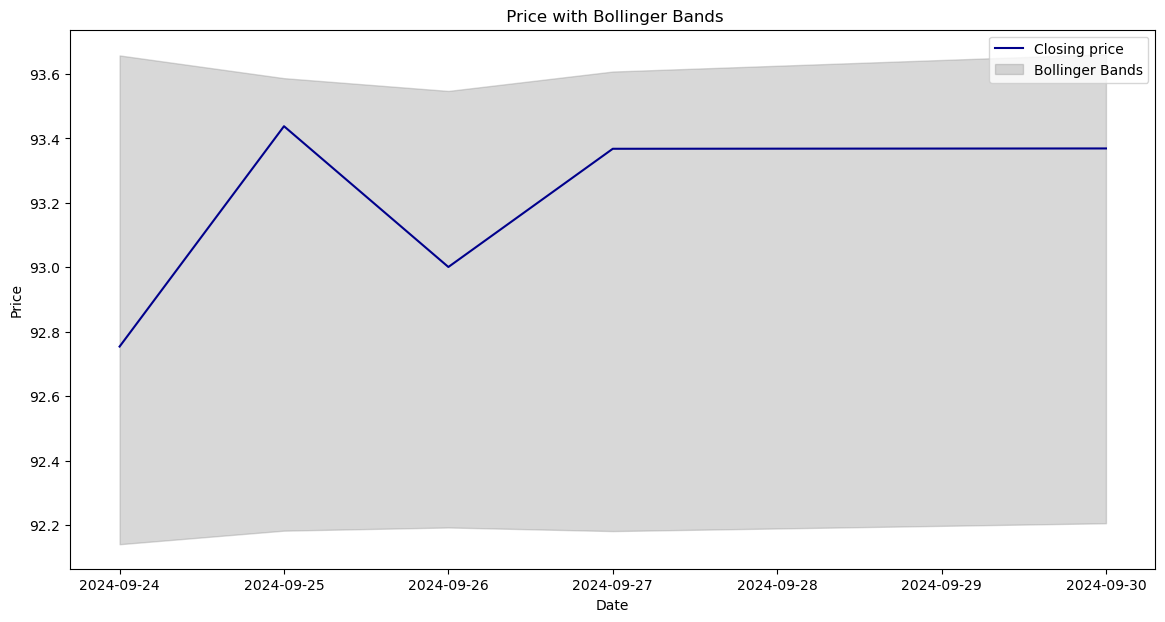

In [522]:
 #plotting bollinger bands

plt.figure(figsize=(14, 7))
plt.plot(one_week.index, one_week['Close'], label='Closing price', color='darkblue')
plt.fill_between(one_week.index, one_week['bollinger_upper'], One_week['bollinger_lower'], color='grey', alpha=0.3, label='Bollinger Bands')
plt.title(' Price with Bollinger Bands', loc='center')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Over the one-week period, the prices consistently moved closer to the upper band, hinting at an overbought condition. A SELL decision is suggested here to lock in profits.


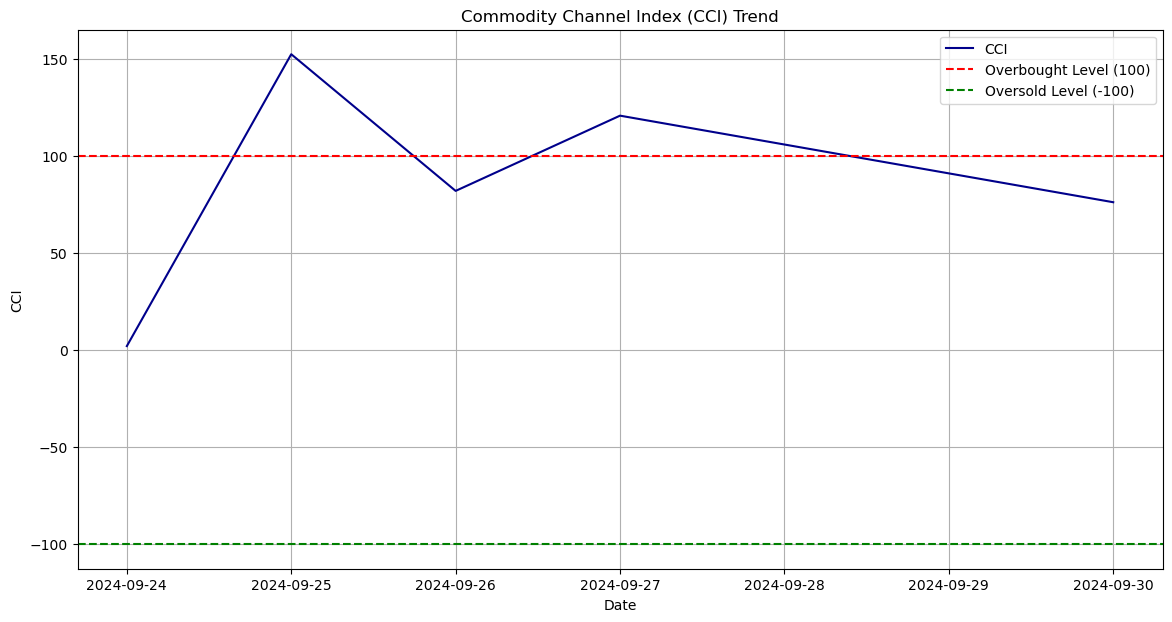

In [525]:
# Plot the price with CCI trends

plt.figure(figsize=(14, 7))
plt.plot(one_week.index, one_week['CCI'], color='darkblue', label='CCI')
plt.axhline(100, color='red', linestyle='--', label='Overbought Level (100)')
plt.axhline(-100, color='green', linestyle='--', label='Oversold Level (-100)')
plt.title('Commodity Channel Index (CCI) Trend')
plt.xlabel('Date')
plt.ylabel('CCI')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Over the week, the CCI value reached a peak of 152.5, indicating an overbought condition earlier in the week. Towards the end, it decreased to a more moderate level (76.25), suggesting that the upward momentum is weakening. Therefore, the medium-term recommendation based on CCI is to SELL.
